In [1]:
import sys
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/Users/gary.ge/Dropbox/codespace/com.fg.python/src/MNIST_data/", one_hot=True);

batch_x, batch_y = mnist.train.next_batch(batch_size=10)
learning_rate = 0.0001
epochs = 10
batch_size = 50

# declare the training data placeholders
x = tf.placeholder(tf.float32, [None, 784], name='x')
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10], name='y_true')
x_shaped = tf.reshape(x, [-1, 28, 28, 1], name='x_shaped')

Extracting /Users/gary.ge/Dropbox/codespace/com.fg.python/src/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/gary.ge/Dropbox/codespace/com.fg.python/src/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/gary.ge/Dropbox/codespace/com.fg.python/src/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/gary.ge/Dropbox/codespace/com.fg.python/src/MNIST_data/t10k-labels-idx1-ubyte.gz


Peek the input data

(28, 28)


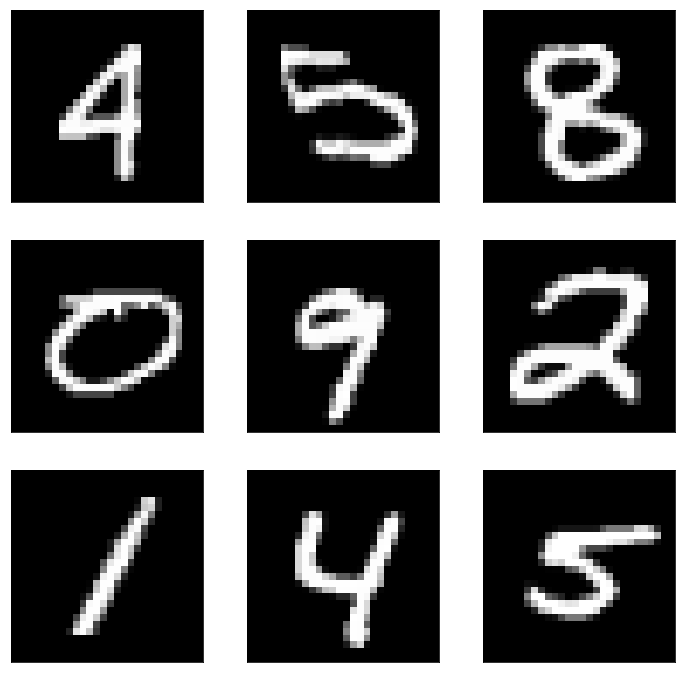

In [2]:
sess = tf.Session()
x_test, y_test = sess.run([x_shaped, y], feed_dict={x: batch_x, y: batch_y})
sess.close()

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0) 

print(np.shape(x_test[0, :, :, 0]))
f, ax = plt.subplots(3, 3)
k = 0;
for i in range(3):
    for j in range(3):
        ax[i, j].matshow(x_test[k, :, :, 0], cmap='gray')
        ax[i, j].set_title('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        k += 1
    
plt.show();

In [2]:
# create a single layer with 32 filters with size 5*5
name="layer1"
num_input_channels=1
num_filters=32
filter_shape=[5, 5]
conv_filt_shape = [filter_shape[0], filter_shape[1], num_input_channels, num_filters]

# initialize weights and bias for the filter conv_filt_shape = [5, 5, 1, 32]
weights = tf.Variable(tf.truncated_normal(conv_filt_shape, stddev=0.03), name=name+'_W')
bias = tf.Variable(tf.truncated_normal([num_filters]), name=name+'_b')

out_layer_conv = tf.nn.conv2d(input=x_shaped,   # [batch, in_height, in_width, in_channels]
                         filter=weights,        # [filter_height, filter_width, in_channels, out_channels]
                         strides=[1, 1, 1, 1],  # move step on each direction
                         padding='SAME', name=name+'_cov1')

Peek the output layer

In [4]:
init_op = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init_op)
# input the first batch, and get output
x_c, w_c, b_c, o_c = sess.run([x_shaped, weights, bias, out_layer_conv], feed_dict={x: batch_x, y: batch_y})
sess.close()
print(np.shape(x_c)); print(np.shape(w_c)); print(np.shape(b_c)); print(np.shape(o_c));
# check the first filter window on first image
print(x_c[0, 10:15, 10:15, 0]);
# print the first filter used for first output channel
print(w_c[0:5, 0:5, 0, 0]);
# mutiple pixels in image window with filter weights
print(np.multiply(w_c[0:5, 0:5, 0, 0], x_c[0, 10:15, 10:15, 0]));
print(np.sum(np.multiply(w_c[0:5, 0:5, 0, 0], x_c[0, 10:15, 10:15, 0])));
# It the same as the output value from out_layer_conv with SAME padding (padding 2 on all directions)
print(o_c[0, 12, 12, 0])

(10, 28, 28, 1)
(5, 5, 1, 32)
(32,)
(10, 28, 28, 32)
[[ 0.          0.02745098  0.73333335  0.98823535  0.59215689]
 [ 0.          0.80000007  0.98823535  0.72941178  0.02352941]
 [ 0.59215689  0.99215692  0.89019614  0.16862746  0.        ]
 [ 0.99215692  0.98431379  0.29411766  0.          0.        ]
 [ 0.98823535  0.49019611  0.          0.          0.        ]]
[[-0.00165    -0.00974018  0.03276205 -0.01853155 -0.00082307]
 [-0.04796055 -0.01960106  0.04767438  0.00931033 -0.03940315]
 [ 0.00295538  0.02990841 -0.02446132 -0.02060298  0.00785133]
 [-0.02318567 -0.02053664  0.00546677  0.01868414 -0.04146226]
 [ 0.00906193  0.01241157  0.01013119 -0.02155818  0.00989802]]
[[-0.         -0.00026738  0.0240255  -0.01831354 -0.00048739]
 [-0.         -0.01568085  0.04711351  0.00679107 -0.00092713]
 [ 0.00175005  0.02967383 -0.02177537 -0.00347423  0.        ]
 [-0.02300382 -0.0202145   0.00160787  0.         -0.        ]
 [ 0.00895532  0.0060841   0.         -0.          0.        ]]

In [3]:
# add the bias
out_layer_add_bias = tf.add(out_layer_conv, bias, name=name+"_bias")
# apply a ReLU non-linear activation
out_layer_relu = tf.nn.relu(out_layer_add_bias, name=name+"_RELU")

# now perform max pooling
pool_shape=[2, 2]
# ksize is the argument which defines the size of the max pooling window 
ksize = [1, pool_shape[0], pool_shape[1], 1]
# strides defines how the max pooling area moves through the image
strides = [1, 2, 2, 1]
out_layer1 = tf.nn.max_pool(out_layer_relu, ksize=ksize, strides=strides, padding='SAME', name=name+"_Maxpool")

peek the output after max pool

In [6]:
init_op = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init_op)
b_c, r_c, o_c = sess.run([out_layer_add_bias, out_layer_relu, out_layer1], feed_dict={x: batch_x, y: batch_y})
sess.close()
print(np.shape(b_c)); print(np.shape(r_c)); print(np.shape(o_c));
i=6; srt=2*i; end=2*(i+1)
print(b_c[1, srt:end, srt:end, 5]); 
print(r_c[1, srt:end, srt:end, 5]); 
print(o_c[1, i, i, 5]); 

(10, 28, 28, 32)
(10, 28, 28, 32)
(10, 14, 14, 32)
[[-0.39704588 -0.3755379 ]
 [-0.32598531 -0.30376124]]
[[ 0.  0.]
 [ 0.  0.]]
0.0


In [4]:
# flatten the output max pooled feature from all 32 channels
flattened = tf.reshape(out_layer1, [-1, 14 * 14 * 32])
    
# setup some weights and bias values for first dense layer with 1000 nodes, then activate with ReLU
wd1 = tf.Variable(tf.truncated_normal([14 * 14 * 32, 1000], stddev=0.03), name='wd1')
bd1 = tf.Variable(tf.truncated_normal([1000], stddev=0.01), name='bd1')
dense_layer1 = tf.add(tf.matmul(flattened, wd1), bd1, name="dense1")
dense_layer1_relu = tf.nn.relu(dense_layer1, name="dense1_RELU")

# another layer to output with final 10 nodes and use softmax activations for prediction
wd2 = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.03), name='wd2')
bd2 = tf.Variable(tf.truncated_normal([10], stddev=0.01), name='bd2')
dense_layer2 = tf.add(tf.matmul(dense_layer1_relu, wd2), bd2, name="dense_layer2")
y_ = tf.nn.softmax(dense_layer2, name="predict_y")

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=dense_layer2, labels=y), 
                               name="cross_entropy")

# add an optimiser
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1), name="accuracy_check")
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="accuracy")

# setup the initialisation operator
init_op = tf.global_variables_initializer()

# setup recording variables
# add a summary to store the accuracy
tf.summary.scalar('accuracy', accuracy)
tf.summary.scalar('cross_entropy', cross_entropy)
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('/Users/gary.ge/Dropbox/codespace/com.fg.python/src/examples/tensorboard/ts03')

epochs = 10
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    total_batch = int(len(mnist.train.labels) / batch_size)
    writer.add_graph(sess.graph);
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print("Epoch:", (epoch + 1), ", cost =", "{:.3f}".format(avg_cost), " test accuracy: {:.3f}".format(test_acc))
        summary = sess.run(merged, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        writer.add_summary(summary, epoch)
    
    print("\nTraining complete!")
    final_accuracy, input_shaped, out_layer_conv, out_layer_relu, output_layer1, dense1, dense2 = sess.run([accuracy, x_shaped, out_layer_conv, out_layer_relu, out_layer1, dense_layer1, dense_layer2], feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print(final_accuracy)


Epoch: 1 , cost = 0.802  test accuracy: 0.886
Epoch: 2 , cost = 0.334  test accuracy: 0.923
Epoch: 3 , cost = 0.266  test accuracy: 0.930
Epoch: 4 , cost = 0.209  test accuracy: 0.948
Epoch: 5 , cost = 0.167  test accuracy: 0.958
Epoch: 6 , cost = 0.138  test accuracy: 0.967
Epoch: 7 , cost = 0.117  test accuracy: 0.962
Epoch: 8 , cost = 0.101  test accuracy: 0.973
Epoch: 9 , cost = 0.088  test accuracy: 0.971
Epoch: 10 , cost = 0.076  test accuracy: 0.978

Training complete!
0.9782


In [34]:
def plot_original_and_layer(nrow, ncol, mat_ori, mat_layers, tag):
    fig, axes = plt.subplots(nrow, ncol)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        if (i == 0):
            ax.imshow(mat_ori, cmap='gray')
            xlabel = "Original Image"
        elif (i <= 32):
            ax.imshow(mat_layers[:, :, i-1], cmap='gray')
            xlabel = tag+" channel #{0}".format(i)
        else:
            ax.imshow(np.zeros(np.shape(mat_ori)), cmap='gray')
            xlabel = ""
        
        ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])


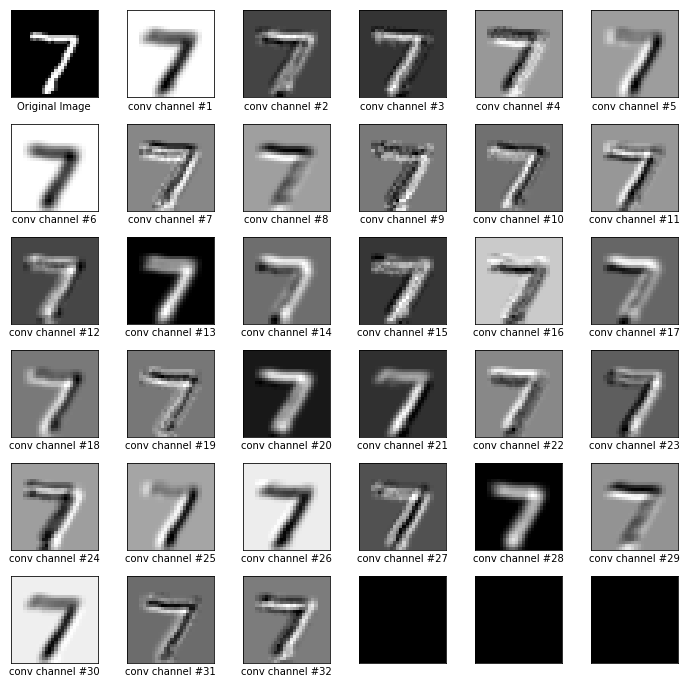

In [35]:
image_index=0
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0) 
# visulize the covlutional layer
plot_original_and_layer(6, 6, input_shaped[image_index, :, :, 0], out_layer_conv[image_index, :, :, :], "conv")
plt.show()

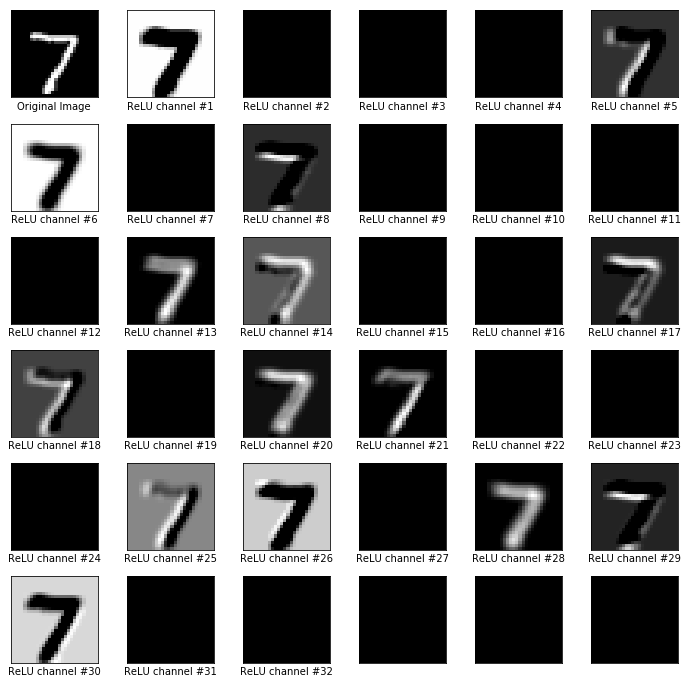

In [39]:
# visulize the ReLU layer
plot_original_and_layer(6, 6, input_shaped[image_index, :, :, 0], out_layer_relu[image_index, :, :, :], "ReLU")

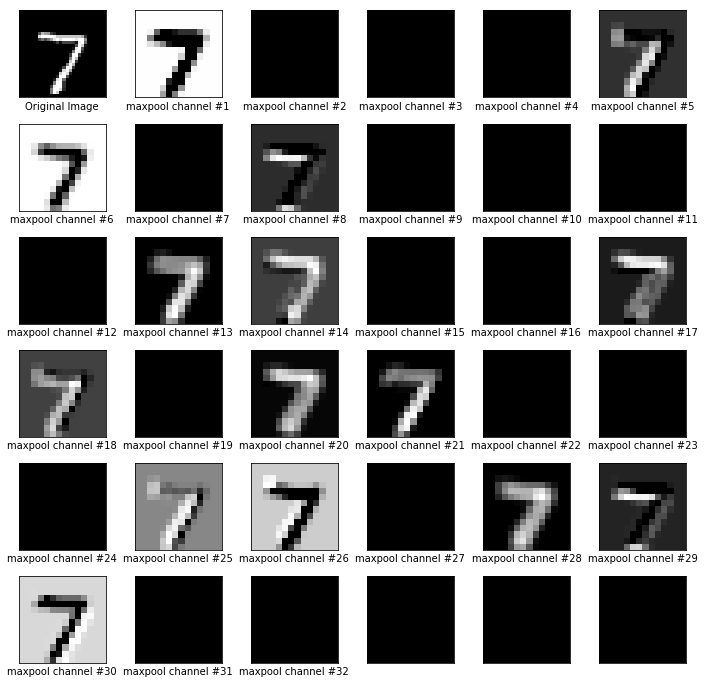

In [40]:
# Visulize the feature images after maxpool
plot_original_and_layer(6, 6, input_shaped[image_index, :, :, 0], output_layer1[image_index, :, :, :], "maxpool")

In [54]:
# visulize the final 0-9 prediction before and after softmax
dense2_array = dense2[image_index, :];
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

print("dense layer #2")
print(dense2_array)
print("probabilities for number 0, 1, 2..., 9")
print(softmax(dense2_array))

dense layer #2
[ -2.46648407  -6.44926643   1.21165502   2.62235379  -7.3579154
  -3.27135062 -13.57719803  11.59324932  -1.48232484  -0.61677217]
probabilities for number 0, 1, 2..., 9
[  7.83182713e-07   1.45936232e-08   3.09926327e-05   1.27033185e-04
   5.88222582e-09   3.50198206e-07   1.17095691e-11   9.99833584e-01
   2.09545397e-06   4.97946394e-06]


In [ ]:
# use shell
cd /Users/gary.ge/Dropbox/codespace/com.fg.python/src/examples/tensorboard
tensorboard --logdir="ts03"